# Week 4 - Classification

This week, we shift from gathering human textual classifications through crowdsourcing, to using machine learning models and algorithms that train on those human classifications and extend them to documents far too numerous to read. If you recall, *clustering* allows us to stably partition text data (e.g., documents, turns of conversation) according to all patterns of covariation among available text features. *Classification*, by contrast, partitions text data according to only those features and their variation that enable us to mimic and extrapolate human annotations.

In this notebook, we will show how to use a variety of classification methods, including Naïve Bayes, Logistic regression, K-nearest neighbor, decision trees and random forests, support vector machines and even a simple neural network, the perceptron. We will also demonstrate ensemble techniques that can link several such methods into a single, more accurate, classification pipeline. We will finally learn to use conventions and metrics to evaluate classifier performance on out-of-sample data. 

For this notebook we will be using the following packages.

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas as pd
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

# Simple Simulated Examples

Here we create a sandbox for you to explore different types of classified data and how different statistical classifiers perform on each type.

## Generating example data

We start by loading one of the "cartoon" or simplified data sets and then dividing it into training and testing sets. To maximize our ability to visualize, each dataset involves two classes, colored yellow and blue, arrayed along two dimensions (`x` and `y`). 

The four data patterns include: 
+ `random` in which the two classes are randomly distributed across both dimensions
+ `andSplit` in which the two classes are linearly split along one of two dimensions (e.g., men like Adidas)
+ `xorSplit` in which the two classes are split, oppositely, along each dimension (e.g., old ladies and young men like Nikes)
+ `targetSplit` in which one class is nested within the other in two dimensions (e.g., middle aged, middle income people like vintage Mustangs)
+ `multiBlobs` in which 5 classes are placed as bivariate Gaussians at random locations

`noise` is a variable [0-1] that ranges from no noise in the prescribed pattern [0] to complete noise/randomness [1].

Uncomment (remove the # in front of) each dataset, one at a time, and then run the cell and subsequent cells to examine how each machine learning approach captures each pattern.

In [3]:
noise = .2

#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.random())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise))
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise)) #Please try this one
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise))
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise))

We can easily visualize the rendered datasets because they are generated in two dimensions.

Let's see what dfTrain, a simulated data that we just made, looks like

In [4]:
dfTrain

,vect,category
958,"[-0.2277146371930148, 0.23015123374420243]",0
706,"[0.0928373691793286, 0.12931338822267752]",0
123,"[-0.531639982425427, 0.45060837804861775]",1
613,"[-0.27073248917182674, 0.7521373205433854]",1
450,"[-0.3184481757369549, 0.2285021910789386]",0
...,...,...
497,"[-0.6825139333667456, 0.11220099263534253]",1
393,"[-0.6110922885361547, -0.39671267198243243]",1
387,"[-0.251775637405627, -0.10635831989437215]",1
422,"[0.04880061152945355, -0.03607560192870364]",0


So, dfTrain has two columns, vect and category. 

In [ ]:
lucem_illud_2020.plotter(dfTrain)

## Training a Machine Learning algorithm

We can now pick a model, there are many more options in `scikit-learn`. These are just a few examples, which array along the machine learning "tribes" described in Pedro Domingos _The Master Algorithm_.

Uncomment (remove the # in front of) each algorithm one at a time, then run the cell and subsequent cells to evaluate how it learns to understand the data.

In [ ]:
#Bayes
#clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

We're using sklearn here. What is sklearn? It's an open source machine learning library for Python. We use sklearn because it features various machine learning algorithms and it works well with NumPy library. You don't need to understand the sklearn package in detail for the moment, but let's see what methods and attributes sklearn has, because we're going to use some of them:

In [ ]:
dir(sklearn)

Now we fit the model by giving it our training data

In [ ]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

Here, "stack" function is used. Why did we use stack function here? This is because dfTrain['vect'] is a sequence, while clf.fit() takes an array element. Let's see what dfTrain['vect'] looks like:

In [ ]:
dfTrain['vect']

And let's see what np.stack(dfTrain['vect']) does:

In [ ]:
np.stack(dfTrain['vect'])

As you can see, stack function takes a sequence of arrays (which have the same shape) and joins them along a new axis.

## Algorithm evaluation

We can look at few measurements of each classifier's performance by using the testing set

In [ ]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)

This lets us look at which classes do better:

In [ ]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)

The greater the area under the curve the better.

In [ ]:
lucem_illud_2020.plotMultiROC(clf, dfTest)

We can also look at the regions the classifer identifies as one class or the other:

In [ ]:
lucem_illud_2020.plotregions(clf, dfTrain)

## Now we do the same for real data

Available data sets include:
+ Reddit threads "classified" by thread topic
+ 20 newsgroups "classified" by group topic
+ Senate press releases "classified" by Senator (2 senators)
+ Senate press releases "classified" by Senator (5 senators)
+ Emails classified as Spam or Ham

In [ ]:
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadReddit())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadNewsGroups())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateSmall())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateLarge())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSpam())

In [ ]:
#Bayes
clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up, but lose ROC
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

In [ ]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

In [ ]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)

In [ ]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)

In [ ]:
lucem_illud_2020.plotMultiROC(clf, dfTest)

In [ ]:
lucem_illud_2020.plotregions(clf, dfTrain)

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<span style="color:red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

### Go through 10 distinct artificial datasets   
1. For randomly generated data: No model classifies well and all of them are around 50% precision rate. It's because the data is randomly generated, and the label is also randomly assigned.   
2. For andSplit generated data: All models seem perform well, and no model perform significantly better than others, of which the precision rate is almost 90%. It's may due to that the data is split linearly, so all models can be trained to a linear classification.
3. For xorSplit generated data: KNN, Decision Tree, Random Forest, Neural Network, Gradient Boosting perform significantly better than others. Because the data is generated and split oppositely along each dimension, while logistic, SVM draw a line to divide the dataset. Our better performing classifiers are non-linear models. With a tree-like structure, they can be trained to classifiy data in multiple dimensions.  
4. For targetSplit generated data, still, the tree-like strucutured models, such as KNN, Decision Tree, Random Forest, Neural Network, Gradient Boosting, perform well again, and SVM, logistic model perform poorly, which is still due to the non-linear classification of the data.  Naive Bayes model does better, because it assumes the predictors are independent. TargetSplit generated data, compared to the xorSplit generated data whose two dimensions are dependent to each other, has independent predictors(vect1, vect2).  
5. For multiBlobs generated data, all models perform well with over 90% precision rate. It's may due to the generated data is separated well.

In [6]:
noise = .2

In [7]:
def classify(dfTrain, dfTest):
    
    d_clf = {'Bayes': sklearn.naive_bayes.GaussianNB(),
             'SVM linear': sklearn.svm.SVC(kernel = 'linear', probability = True),
             'SVM poly': sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True),
             'KNN': sklearn.neighbors.KNeighborsClassifier(5, weights='distance'),
             'Logistic': sklearn.linear_model.LogisticRegression(),
             'Decisiontree': sklearn.tree.DecisionTreeClassifier(),
             'Randomforest': sklearn.ensemble.RandomForestClassifier(),
             'Neural Network': sklearn.neural_network.MLPClassifier(),
             'Boosting': sklearn.ensemble.GradientBoostingClassifier()}
    d_evaluation = {}
    for name, clf in d_clf.items():
        clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
        evaluation = lucem_illud.evaluateClassifier(clf, dfTest)["Precision"].mean()
        d_evaluation[name] = evaluation
        print(name, evaluation)
    max_score = max(d_evaluation.values())
    best_model = list(d_evaluation.keys())[list(d_evaluation.values()).index(max_score)]
    print('\nThe best classifier based on Precision is', best_model)

In [8]:
# 1
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.random())
classify(dfTrain, dfTest)

Bayes 0.4264555669050051
SVM linear 0.23
SVM poly 0.4947156167431511
KNN 0.5040404040404041
Logistic 0.5442708333333334
Decisiontree 0.5040404040404041


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Randomforest 0.5116185897435898
Neural Network 0.48814229249011853
Boosting 0.5242953178440853

The best classifier based on Precision is Logistic


In [9]:
# 2
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.andSplit(noise))
classify(dfTrain, dfTest)

Bayes 0.9025491770373344
SVM linear 0.9025491770373344
SVM poly 0.8902275769745649
KNN 0.9179066707156595
Logistic 0.9025491770373344
Decisiontree 0.867249522661039
Randomforest 0.8973686863595121
Neural Network 0.9025491770373344
Boosting 0.9125853071055801

The best classifier based on Precision is KNN


In [10]:
# 3
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.xorSplit(noise)) #Please try this one
classify(dfTrain, dfTest)

Bayes 0.4576703386372909
SVM linear 0.6702951408371676
SVM poly 0.7458789689124903
KNN 0.8897889788978899
Logistic 0.4675324675324676
Decisiontree 0.8646458583433374
Randomforest 0.899749373433584
Neural Network 0.9046618647458984
Boosting 0.8997899789978998

The best classifier based on Precision is Neural Network


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [11]:
# 4
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise))
classify(dfTrain, dfTest)

Bayes 0.896256630967871
SVM linear 0.7425595238095238
SVM poly 0.7526881720430108
KNN 0.9
Logistic 0.6272977941176471
Decisiontree 0.8800322061191627
Randomforest 0.8844460014012612
Neural Network 0.907070707070707
Boosting 0.8747374737473748

The best classifier based on Precision is Neural Network


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
# 5
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.multiBlobs(noise))
classify(dfTrain, dfTest)

Bayes 0.9849036820890724
SVM linear 0.9849036820890724
SVM poly 0.9764975666253498
KNN 0.9754934367876384
Logistic 0.9849036820890724
Decisiontree 0.9679764583693959


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Randomforest 0.9735425639266847


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network 0.9792508516798509
Boosting 0.9737775006680323

The best classifier based on Precision is Bayes


### Go through real data

* New Group data: Logistic regression model works the best based on the precision, and Neural NEtwork, Random Forest and SVM (kernel=linear) works also well at a similiar level.
* Senate Small data: Decision Tree works best with a precision of about 0.9914, and SVM (kernal=linear), Decision Tree, Random Forest and Boosting all work very well at a precision rate above 0.98. Neural Network seems also ok with precision of 0.94
* Senate Large data: Decision Tree works best, with a precision rate of 0.99. Random Forest and Neural Network also works well with a precision rate of above 0.9. 
* Logistic worsk best, SVM (kernel=poly) and Boosting also perform well with a precision rate over 0.9

In [13]:
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadNewsGroups())
classify(dfTrain, dfTest)

Loading data for: comp.sys.mac.hardware
Loading data for: comp.windows.x
Loading data for: misc.forsale
Loading data for: rec.autos
Converting to vectors
Bayes 0.7912077869193821
SVM linear 0.8786942812561838
SVM poly 0.8367730144419598
KNN 0.4711827284105131
Logistic 0.9124304090265188
Decisiontree 0.7054845741964014
Randomforest 0.8602059148700939
Neural Network 0.8789567183462532
Boosting 0.8238069368640928

The best classifier based on Precision is Logistic


In [14]:
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSenateSmall())
classify(dfTrain, dfTest)

Loading senate data
Converting to vectors
Bayes 0.8320225111856823
SVM linear 0.9895287958115183
SVM poly 0.9160022148394241
KNN 0.8637866887143448
Logistic 0.981958762886598
Decisiontree 0.9914128772076207
Randomforest 0.9887740183792815
Neural Network 0.9412942077415761
Boosting 0.9887740183792815

The best classifier based on Precision is Decisiontree


In [15]:
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSenateLarge())
classify(dfTrain, dfTest)

Loading senator: Klobuchar
Loading senator: Kyl
Loading senator: Kerry
Loading senator: Kohl
Loading senator: Kennedy
Converting to vectors
Bayes 0.8159413404860377
SVM linear 0.9726121203630193
SVM poly 0.8778401688061586
KNN 0.7969582338154961
Logistic 0.9701914676596243
Decisiontree 0.9994444444444444
Randomforest 0.9988919667590028
Neural Network 0.9582719569882355
Boosting 0.9994444444444444

The best classifier based on Precision is Decisiontree


In [16]:
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSpam())
classify(dfTrain, dfTest)

Loading Spam
Loading Ham
Converting to vectors
Bayes 0.6982758620689655
SVM linear 0.8901139383732863
SVM poly 0.9236306729264476
KNN 0.872408293460925
Logistic 0.946048632218845
Decisiontree 0.8469696969696969
Randomforest 0.9053832521045636
Neural Network 0.8286119753288577
Boosting 0.9156745541668725

The best classifier based on Precision is Logistic


### New method  
I adopt AdaBoost as a new method to try. Reference to understanding the mechanism: https://www.mygreatlearning.com/blog/adaboost-algorithm/ 

AdaBoost is Adaptive Boosting, during the training process, the weights are re-assigned to each instance, with higher weights to incorrectly classified instances. 


For the multilBlobs() generated data, all classifiers work well except AdaBoost. AdaBoost only result in a precision rate of 0.38, while other methods have precision of above 0.9.  
The reason why AdaBoost has such a poor performance may be that the AdaBoost is sensitive to the outliers in the data while adapting the weights while trianing, and in our generated data there are many random elements.  

For SenateSmall data, AdaBoost performs much better, with a precision rate of over 0.99.

In [17]:
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.multiBlobs(noise))
classify(dfTrain, dfTest)
clf = sklearn.ensemble.AdaBoostClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
print("AdaBoost", lucem_illud.evaluateClassifier(clf, dfTest)['Precision'].mean())


Bayes 0.9684107349110006
SVM linear 0.9684107349110006
SVM poly 0.9643572610043198
KNN 0.9683591097615004


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic 0.9684107349110006
Decisiontree 0.9437200344068393
Randomforest 0.9646712765842569


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network 0.9703624480095069
Boosting 0.9565894661681724

The best classifier based on Precision is Neural Network
AdaBoost 0.3823214285714286


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSenateSmall())
classify(dfTrain, dfTest)
clf = sklearn.ensemble.AdaBoostClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
print("AdaBoost", lucem_illud.evaluateClassifier(clf, dfTest)['Precision'].mean())

Loading senate data
Converting to vectors
Bayes 0.7973848113808479
SVM linear 0.9921465968586387
SVM poly 0.8705941983780412
KNN 0.8649624798372957
Logistic 0.9895833333333333
Decisiontree 0.9940724516757058
Randomforest 0.9967532467532467
Neural Network 0.9261347813979393
Boosting 0.9914195210247843

The best classifier based on Precision is Randomforest
AdaBoost 0.9967532467532467


# Clinton / Obama Press Releases

We often will not have nicely prepared data, so we will work though the proccess of cleaning and structuring in more detail here:

While the Clinton and Obama Senatorial Press Releases are not hand-coded, we can imagine that we have been given a stack of such press releases, but lost the metadata associated with which senatorial office issued which. If we label a few of them, how well can our classifier do at recovering the rest? 

In [81]:
ObamaClintonReleases = pandas.read_csv('../data/ObamaClintonReleases.csv', index_col=0)

I'm pretty sure that you're all familiar with pandas, but, just to clarify: why do we use pandas here? pandas is a Python library which is widely used for analyzing and wrangling data. In particular, pandas loads data and creates data frame, a Python object that looks familiar to us (since it looks like a excel table) and easy to work with. So, using pandas.read_csv function, we take in the csv file and convert it into a data frame. 

In [82]:
type(ObamaClintonReleases)

pandas.core.frame.DataFrame

It's a DataFrame! and it looks like this:

In [83]:
ObamaClintonReleases

,download_url,html_url,name,path,text,targetSenator
0,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Apr2007Obama430.txt,raw/Obama/10Apr2007Obama430.txt,Obama Calls on IRS to Protect Taxpayers ...,Obama
1,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Apr2008Obama108.txt,raw/Obama/10Apr2008Obama108.txt,Statement from Senator Barack Obama on the ...,Obama
2,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Aug2005Obama674.txt,raw/Obama/10Aug2005Obama674.txt,Obama Says Bill Will Help Cut Off Supply of...,Obama
3,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Aug2005Obama675.txt,raw/Obama/10Aug2005Obama675.txt,Obama Durbin Say Illinois Will Receive 33 ...,Obama
4,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Aug2006Obama508.txt,raw/Obama/10Aug2006Obama508.txt,Obama Introduces Bill to Help Tap Power of ...,Obama
...,...,...,...,...,...,...
1704,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,1Sep2005Clinton285.txt,raw/Clinton/1Sep2005Clinton285.txt,September 1 2005 Senator Clinton Visit Infoto...,Clinton
1705,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,1Sep2005Clinton286.txt,raw/Clinton/1Sep2005Clinton286.txt,September 1 2005 Senator Clinton Announces Ex...,Clinton
1706,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,1Sep2005Clinton287.txt,raw/Clinton/1Sep2005Clinton287.txt,September 1 2005 Senator Clinton Joins Local ...,Clinton
1707,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,1Sep2006Clinton207.txt,raw/Clinton/1Sep2006Clinton207.txt,September 1 2006 Clintons Meet with Cazenovia...,Clinton


Neat! Let's turn the 'targetSenator' column into a binary category variable.

In [84]:
ObamaClintonReleases['category'] = [s == 'Obama' for s in ObamaClintonReleases['targetSenator']]

Tokenize and normalize

In [ ]:
ObamaClintonReleases['tokenized_text'] = ObamaClintonReleases['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
ObamaClintonReleases['normalized_text'] = ObamaClintonReleases['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

Let's split the data into training data and testing data.

In [ ]:
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(ObamaClintonReleases, holdBackFraction=holdBackFraction)

In [ ]:
print(len(train_data_df))
print(len(test_data_df))

## Logistic Regression

First, let's try with a logistic regression, which may be familiar to you from statistical methods classes. First, we must turn the training dataset into a tf-idf matrix (`lucem_illud_2020.generateVecs()` will help with this but for now we are doing it the long way):

In [ ]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['text'])

The core function here is TfidfVectorizer, which takes a collection of raw documents and turn them to a tf-idf matrix. Just to recap: tf-idf means term frequency-inverse document frequency, a statistic (or, more precisely, a product of two statistics, term frequency and inverse document frequency) that shows the importance of a term vis-a-vis documents. TF, or, term frequency, counts how many times a term is used in a document; IDF, or, inverse-document-frequency, measures common or rare a term appears across documents. 

Let's look at three parameters of TfidfVectorizer: max_df = 100, min_df = 2, and norm='l2'. What do those parameters mean? 

(1) max_df = 100

Here, we specified a thredhold of 100, and the terms that have a document frequency higher than 100 would be ignored.

(2) min_df = 2

We specified a lower bound, 2, and the terms that have a document frequency lower than 2 will be ignored.

(3) norm = 'l2'

This parameter is about vector normalization. In machine learning, we commonly normalize vectors, i.e., change the length of vectors and turn them into a unit vector, before passing them into algorithms. There are various ways of normalizations, and this parameter specifies how we normalize vectors. Here, we set the norm to l2, in which case, we normalize the vectors such that squares of vector elements sums to 1. Alternatively, we can set it to l1, in which case the sum of absolute values of vector elements, not the square of vector elements, is 1. 

fit_transform() literally fits to data and then transform it. So, fit_transform() is just a combination of two steps--(1) fitting parameters to data; (2) then, using the vocabulary and document frequencies learned by fit(), transforming documents into document-term matrix. So, it's the same as fit followed by transform. 

Note that we can use the CountVectorizer instead, which simply produces a matrix of word counts.

In [ ]:
TFVects.shape

We can save this in the dataframe to make things easier

In [ ]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

Looks simple, but we need to know what todense() does here. todense() returns a dense matrix representation of the matrix. Why do we need this? As you can see above, the TFVects, a document-term matrix, has 11349 columns, and this matrix is sparse, in the sense that it is comprised mostly of zeros. Dense matrices, in contrast, are the matrices that are comprised of mostly non-zeros. Then why do we make sparse matrices into dense ones? Because zero values don't contain important information but take up so much memory.

In a regression, we cannot have more variables than cases. So, we need to first do a dimension reduction. First, we will approah this with PCA. You have previously seen this in week 3. Here we are not concerned about visualization, but rather classification and so all principal components are calculated. Watch out: we have to use `stack` not `sum` for combining the vectors. We note that you could also use topic loading and embedding dimensions as featured variables.

In [ ]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))

We can store the PCA space vectors in the dataframe too:

In [ ]:
train_data_df['pca'] = [r for r in reduced_data]

Visualization in 2D:

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot Obama
a = np.stack(train_data_df[train_data_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot not Obama
a = np.stack(train_data_df[train_data_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is Obama')
plt.title('True Classes, Training Set')
plt.show()

PCA cannot distinguish Obama very well. Let's perform a screeplot to see how many Principal Components we need.

In [ ]:
n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

Let's choose the first 10 pricipal components as our covariates.

In [ ]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

Now we fit a logistic regression to our data.

In [ ]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

Let's see how the logistic regression performs on the training dataset from which we develop the model. Unfortunately, the mean accuracy is only about 64%.

In [ ]:
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

How does it perform on the testing dataset, which we "held out" and did not use for model training? We need to repeat all the steps on the testing data, but without retraining:

In [ ]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['text'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['category'])

Slightly poorer. How about using more dimensions (40)?

In [ ]:
train_data_df['pca_reduced_40'] = train_data_df['pca'].apply(lambda x: x[:40])
test_data_df['pca_reduced_40'] = test_data_df['pca'].apply(lambda x: x[:40])

logistic.fit(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_40'], axis=0), test_data_df['category']))

Or still more (100)?

In [ ]:
train_data_df['pca_reduced_100'] = train_data_df['pca'].apply(lambda x: x[:100])
test_data_df['pca_reduced_100'] = test_data_df['pca'].apply(lambda x: x[:100])

logistic.fit(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_100'], axis=0), test_data_df['category']))

Or even more (200)!

In [ ]:
train_data_df['pca_reduced_200'] = train_data_df['pca'].apply(lambda x: x[:200])
test_data_df['pca_reduced_200'] = test_data_df['pca'].apply(lambda x: x[:200])

logistic.fit(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_200'], axis=0), test_data_df['category']))

This is becoming ridiculous (400)!

In [ ]:
train_data_df['pca_reduced_400'] = train_data_df['pca'].apply(lambda x: x[:400])
test_data_df['pca_reduced_400'] = test_data_df['pca'].apply(lambda x: x[:400])

logistic.fit(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_400'], axis=0), test_data_df['category']))

Increasing the number of covariates would overfit our data, and it seems that using a logistic regression, our prediction accuracy is at best about 65%. We can, however, try a logistic regression that uses the TF-IDF scores for each word, but with an L1 regularization or L1-norm loss function, which is also known as least absolute deviations (LAD), least absolute errors (LAE) or L1 penalty. It minimizes the sum of the absolute differences (S) between the target value ($Y_i$) and the estimated values ($f(x_i)$) and prunes all insignificant variables (i.e., word TF-IDF scores):

$S=\sum^n_{i=1}|y_i=f(x_i)|$

The result is a model retaining only the most individually significant features.

In [ ]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

Train the model using training data, and then test it on the testing data.

In [ ]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

81% accuracy seems like the best we can get by using a logistic regression.

Now let's try with Naive Bayes. Classically, it is trained with word counts, but TF-IDF vectors are also quite good:

In [ ]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

In [ ]:
print("Training:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

A bit better than the logit, but that's just looking at the accuracy. What about other measures? Let's first save the predictions in the dataframe to save use rerunning the model every time:

In [ ]:
test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

Precision:

In [ ]:
sklearn.metrics.precision_score(test_data_df['category'], test_data_df['nb_predict'])

Recall:

In [ ]:
sklearn.metrics.recall_score(test_data_df['category'], test_data_df['nb_predict'])

F1-measure:

In [ ]:
sklearn.metrics.f1_score(test_data_df['category'], test_data_df['nb_predict'])

Let's take a look at how well our posterior distribution looks relative to the truth.

In [ ]:
fig, ax = plt.subplots()
ax.grid(False)
ax.set_frame_on(False)
test_data_df[test_data_df['category'].eq(True)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'True', color = 'red')
test_data_df[test_data_df['category'].eq(False)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'False', color = 'blue')
ax.set_xlim((0,1.1))
ax.legend(title = "Is Obama")
ax.set_xlabel('posterior')
ax.set_ylabel('counts')
plt.show()

The classification is suprisingly accurate. We can even look at what words are most influential with a bit of simple math:

In [ ]:
#Top indices
trueVals, falseVals = naiveBayes.feature_log_prob_

words_dict = {
    'Obama' : [],
    'Obama_log_prob' : [],
    'Clinton' : [],
    'Clinton_log_prob' : [],
}

for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Obama'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Obama_log_prob'].append(prob)

for i, prob in sorted(enumerate(falseVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Clinton'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Clinton_log_prob'].append(prob)
    
pandas.DataFrame(words_dict)

## Multinomial Naive Bayes

What if we want to classify our text into one of *many* classes? The multinomial Naive Bayes generating model assumes that document features (e.g., words) are generated by draws from a multinomial distribution (recall this gives the probability to observe a particular pattern of counts across features). 

Let's use again the dataset we used in week 3, the 20 newsgroup dataset.

In [ ]:
newsgroups = sklearn.datasets.fetch_20newsgroups(data_home = '../data') #Free data to play with: documents from a newsgroup corpus.
newsgroups.target_names #Possible categories, i.e., the newsgroups

We can pick specific categories, and pull the relevant training and testing sets. 

In [ ]:
target_categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics'] #Can change these of course

newsgroupsDF = pandas.DataFrame(columns = ['text', 'category', 'source_file'])
for category in target_categories:
    print("Loading data for: {}".format(category))
    ng = sklearn.datasets.fetch_20newsgroups(categories = [category], remove=['headers', 'footers', 'quotes'], data_home = '../data')
    newsgroupsDF = newsgroupsDF.append(pandas.DataFrame({'text' : ng.data, 'category' : [category] * len(ng.data), 'source_file' : ng.filenames}), ignore_index=True)

Now we need to tokenize, and make a training and testing set:

In [ ]:
newsgroupsDF['tokenized_text'] = newsgroupsDF['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
newsgroupsDF['normalized_text'] = newsgroupsDF['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [ ]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud_2020.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

In [ ]:
print(len(train_ng_df))
print(len(test_ng_df))

We need to extract features from the text. We can use built-in feature extraction to do so. We will use a tf-idf vectorizer, which converts the document into a vector of words with tf-idf weights (term-frequency inverse-document frequency). This gives high weight to words that show up a lot in a given document, but rarely across documents in the corpus (more distinctive). 

In [ ]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

Now we can train the model:

In [ ]:
MultinomialNB_ng = sklearn.naive_bayes.MultinomialNB()
MultinomialNB_ng.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

...and save predictions to the dataframe:

In [ ]:
train_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(train_ng_df['vect'], axis=0))
print("Training score:")
print(MultinomialNB_ng.score(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category']))

In [ ]:
train_ng_df[['category', 'nb_predict']][:10]

Looks pretty good, lets examine the testing dataset:

In [ ]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(MultinomialNB_ng.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

We can even use a confusion matrix, like we used last week for evaluating human coders relative to one another. Now we are evaluating our classifier relative to human coding. We'll just use the one in `lucem_illud_2020`, which requres a classifier and a dataframe with `'vect'` and `'category'` columns, like we have in the examples:

In [ ]:
lucem_illud_2020.plotConfusionMatrix(MultinomialNB_ng, test_ng_df)

Let's calculate the precision, recall, and F-measures.

In [ ]:
print(sklearn.metrics.precision_score(test_ng_df['category'], test_ng_df['nb_predict'], average = 'weighted')) #precision
print(sklearn.metrics.recall_score(test_ng_df['category'], test_ng_df['nb_predict'], average = 'weighted')) #recall
print(sklearn.metrics.f1_scoretest_ng_df['category'], test_ng_df['nb_predict'], average = 'weighted')) #F-1 measure

We can evaluate these per catagory. This has the same requiments as `plotConfusionMatrix`:

In [ ]:
lucem_illud_2020.metrics.evaluateClassifier(MultinomialNB_ng, test_ng_df)

We can also plot the ROC curves. This has the same requiments as `plotConfusionMatrix`:

In [ ]:
lucem_illud_2020.plotMultiROC(MultinomialNB_ng, test_ng_df)

And we can plot the PCA space visualization:

In [ ]:
lucem_illud_2020.plotregions(MultinomialNB_ng, test_ng_df)

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">In the cells immediately following, perform Logistic and Naïve Bayes classification (binary or multinomial) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.


As the data for the project doesn't have categories, so I use a dataset from Kaggle instead. This dataset contains 8000 US news items, and is labeled with "yes" if the news is relevant to US economy, and "no" otherwise.  

Below are my application of the different classification work this small dataset. Actually, roughly speaking the classification outcome is not ideal. I think it's may due to the nature of this dataset, that news is labeled with whether it is relevant to US economy, with this simple dimension. While using the classification methods, the texts may be classified based on other complex dimensions. 

Logistic regression with penalty for the training data and test data have an accuracy of 0.82 and 0.83 respectively, very similiar to the simple logistic regression.  

Overall, logistic regression does better than naive bayes. Naive bayes has a higher training accuracy of around 0.9, but the testing accrucy is below 0.8, which performs poorer than the logistic regression.

### Logistic

First, prepare the data

In [50]:
sample = pd.read_csv('../data/US-Economic-News_kaggle.csv')
sample.rename(columns = {'relevance':'category'},inplace=True)

In [51]:
sample['category'] = [s == 'yes' for s in sample['category']]

In [52]:
sample = lucem_illud.generateVecs(sample)

In [53]:
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud.trainTestSplit(sample, holdBackFraction=holdBackFraction)
print(len(train_data_df))
print(len(test_data_df))

6400
1600


I randomly sample a small dataset, 40% from the original dataset, and uncode it to get the uncoded data for further use.

In [54]:
uncoded = sample.sample(frac = 0.4, random_state = 1)
uncoded = uncoded.drop(['category'], axis = 1)

Logit

In [58]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['text'])

In [59]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In [60]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))
train_data_df['pca'] = [r for r in reduced_data]

In [61]:
train_data_df['category']

7145    False
4418    False
2333     True
5466    False
5650    False
        ...  
7061    False
577     False
2405    False
2829    False
608     False
Name: category, Length: 6400, dtype: bool

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


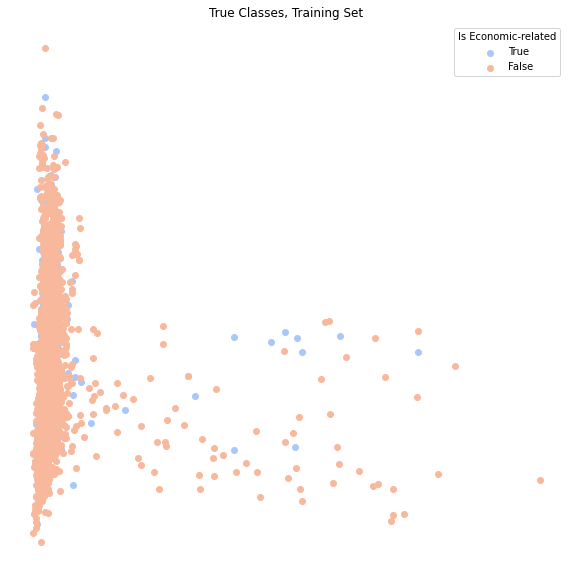

In [62]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot Economic related
a = np.stack(train_data_df[train_data_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")
#Plot not Economic related
a = np.stack(train_data_df[train_data_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is Economic-related')
plt.title('True Classes, Training Set')
plt.show()

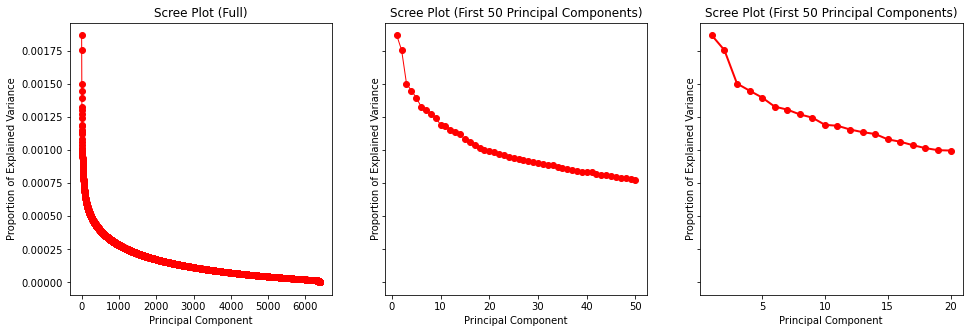

In [63]:
n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

First I try use 10 components

In [64]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

0.82109375

In [66]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['text'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['category'])

0.826875

In [69]:
logistic_2= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_2.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_2.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print(logistic_2.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

0.8278125
0.82625


In [84]:
lucem_illud.evaluateClassifier(logistic_2, train_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.172656,0.522472,0.825929,0.825929,1.000000
True,0.172656,0.522472,1.000000,0.217600,0.044944


In [85]:
lucem_illud.evaluateClassifier(logistic_2, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.16625,0.500405,0.835737,0.835736,0.997008
True,0.16625,0.500405,0.200000,0.164510,0.003802


0.0038022813688212928
0.2
0.007462686567164179


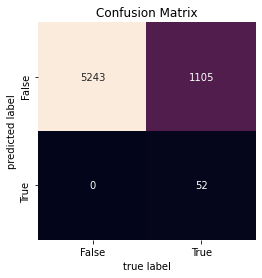

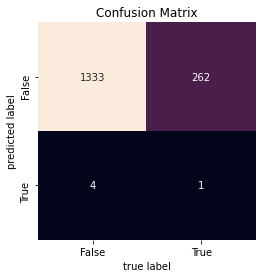

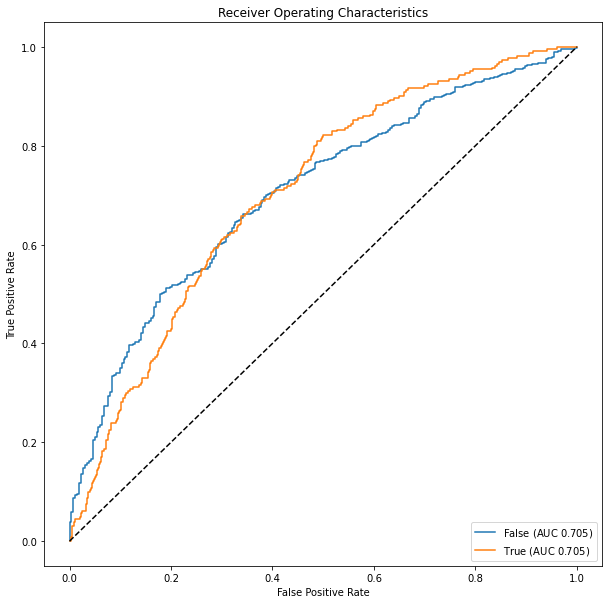

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


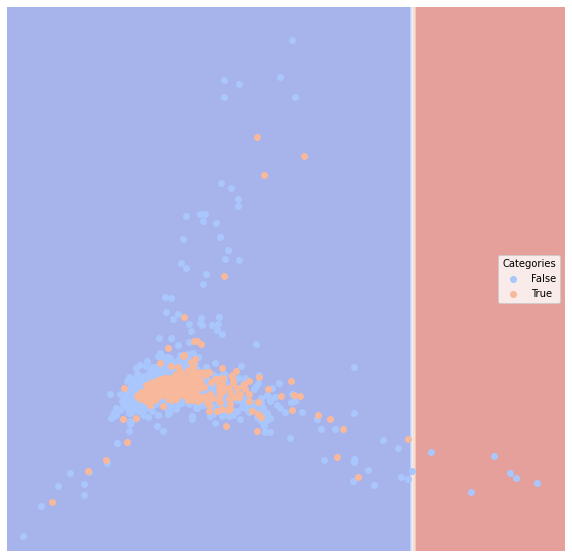

In [83]:
test_data_df['log_predict']=logistic_2.predict(np.stack(test_data_df['vect'], axis=0))
print(sklearn.metrics.precision_score(test_data_df['log_predict'], test_data_df['category']))
print(sklearn.metrics.recall_score(test_data_df['log_predict'], test_data_df['category']))
print(sklearn.metrics.f1_score(test_data_df['log_predict'], test_data_df['category']))
lucem_illud.plotConfusionMatrix(logistic_2, train_data_df)
lucem_illud.plotConfusionMatrix(logistic_2, test_data_df)
lucem_illud.plotMultiROC(logistic_2, test_data_df)
lucem_illud.plotregions(logistic_2, test_data_df)

To apply the prediction on the uncoded data with logistic regression

In [16]:
TFVects_uncoded = TFVectorizer.transform(uncoded['text'])
uncoded['vect'] = [np.array(v).flatten() for v in TFVects_uncoded.todense()]
uncoded['pred'] = logistic_2.predict(np.stack(uncoded['vect'], axis=0))
uncoded['pred_prob_true'] = logistic_2.predict_proba(np.stack(uncoded['vect'], axis=0))[:,0]
uncoded[['text', 'pred', 'pred_prob_true']].head()

,text,pred,pred_prob_true
4740,The economic boom of the 1990s raised the inco...,False,0.871395
5606,"Stocks advanced broadly today, breaking a four...",False,0.577335
4824,Stock prices tumbled for the fourth straight d...,False,0.651750
4205,"With beef prices again leading the way, the co...",False,0.862657
3228,HSBC Holdings' takeover this week of Mexico's ...,False,0.795986


### Naive Bayes

In [70]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

0.90875
0.7975


In [48]:
lucem_illud.evaluateClassifier(naiveBayes, train_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.087187,0.846673,0.945966,0.939726,0.948475
True,0.087187,0.846673,0.754291,0.606537,0.744871


In [71]:
lucem_illud.evaluateClassifier(naiveBayes, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.2025,0.575163,0.852217,0.850144,0.913962
True,0.2025,0.575163,0.363128,0.217080,0.236364


precision 0.23636363636363636
recall 0.36312849162011174
f1measure 0.28634361233480177


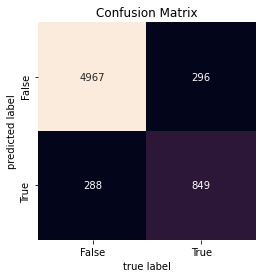

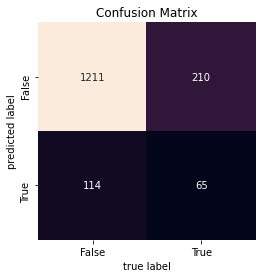

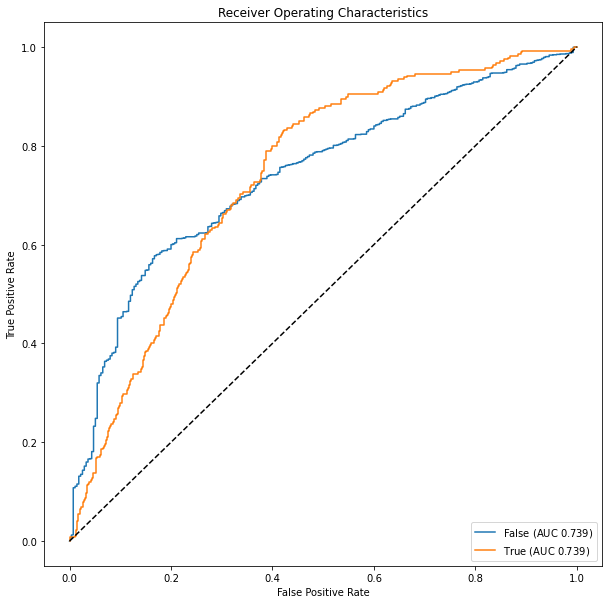

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


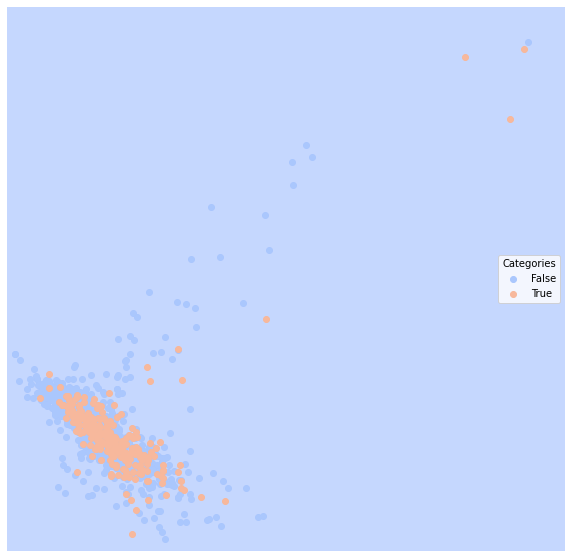

In [73]:
test_data_df['bayes_pred']=naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
print('precision', sklearn.metrics.precision_score(test_data_df['bayes_pred'], test_data_df['category']))
print('recall', sklearn.metrics.recall_score(test_data_df['bayes_pred'], test_data_df['category']))
print('f1measure',sklearn.metrics.f1_score(test_data_df['bayes_pred'], test_data_df['category']))
lucem_illud.plotConfusionMatrix(naiveBayes, train_data_df)
lucem_illud.plotConfusionMatrix(naiveBayes, test_data_df)
lucem_illud.plotMultiROC(naiveBayes, test_data_df)
lucem_illud.plotregions(naiveBayes, test_data_df)


To apply the prediction on the uncoded data with logistic regression

In [74]:
TFVects_uncoded = TFVectorizer.transform(uncoded['text'])
uncoded['vect'] = [np.array(v).flatten() for v in TFVects_uncoded.todense()]
uncoded['pred'] = naiveBayes.predict(np.stack(uncoded['vect'], axis=0))
uncoded['pred_prob_true'] = naiveBayes.predict_proba(np.stack(uncoded['vect'], axis=0))[:,0]
uncoded[['text', 'pred', 'pred_prob_true']].head()

,text,pred,pred_prob_true
4740,The economic boom of the 1990s raised the inco...,False,0.999925
5606,"Stocks advanced broadly today, breaking a four...",True,0.037251
4824,Stock prices tumbled for the fourth straight d...,True,0.120794
4205,"With beef prices again leading the way, the co...",False,0.999924
3228,HSBC Holdings' takeover this week of Mexico's ...,False,0.926150


# Decision Trees

Decision trees can be used to predict both categorical/class labels (i.e., classification) and continuous labels (i.e., regression).

In [ ]:
blobs_df = lucem_illud_2020.multiBlobs(noise=.2, centers=[(0,0), (0,5), (5,0), (-5,0), (0,-5)])
df_exampleTree_train, df_exampleTree_test = lucem_illud_2020.trainTestSplit(blobs_df)
lucem_illud_2020.plotter(df_exampleTree_train)

Now we import our Decision Tree classifier from sklearn.tree (familiar syntax) and fit it using the fit method.

In [ ]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])

To see what's going on visually with the classification: 

In [ ]:
lucem_illud_2020.plotregions(clf_tree, df_exampleTree_train)

In [ ]:
lucem_illud_2020.evaluateClassifier(clf_tree, df_exampleTree_test)

Lets look at accuracy:

In [ ]:
sklearn.metrics.accuracy_score(df_exampleTree_test['category'],clf_tree.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))

What happens if we trim the tree?

In [ ]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])
    score = sklearn.metrics.accuracy_score(df_exampleTree_test['category'], tree2.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

We can select different layers of the decision tree or "prune" it. At approximately four layers down in the decision tree, the shape is somewhat odd, suggesting that our model is overfitting beyond those four layers.

Combining multiple overfitting estimators turns out to be a key idea in machine learning. This is called **bagging** and is a type of **ensemble** method. The idea is to make many randomized estimators--each can overfit, as decision trees are wont to do--but then to combine them, ultimately producing a better classification. A **random forest** is produced by bagging decision trees.

In [ ]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [ ]:
bag.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category']) #Fit the bagged classifier

In [ ]:
lucem_illud_2020.plotregions(bag, df_exampleTree_test)

In [ ]:
lucem_illud_2020.evaluateClassifier(bag, df_exampleTree_test)

In [ ]:
lucem_illud_2020.plotConfusionMatrix(bag, df_exampleTree_test)

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

The decision tree doesn't perform very well on this specific dataset. On both training and testing dataset, the categories are tend to be predicted as *False*, and the precision rate of category False is relatively high (not surprising with my previous mentioning), but the average precision rate of category True is very low.    


With increasing the hyperparameter of max_depth (max_depth = 12), the precision for the training data increases a little bit compared to (max_depth = 4), BUT the precision for the testing data decreases. I think it may be due to the overfitting problem after adjusting the max_depth.   


With bagging, the prediction doesn't improve much. Ensemble methods samples data with replacement from the original training dataset, so it can get a larger set of training data when the observations are limited. 

### Fit the decision tree and calculate the statistics

In [20]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['category'])

DecisionTreeClassifier(max_depth=4, random_state=0)

In [84]:
print(sklearn.metrics.accuracy_score(train_data_df['category'], 
                            tree.predict(np.stack(train_data_df['vect'], axis = 0))))
print(sklearn.metrics.accuracy_score(test_data_df['category'], 
                            tree.predict(np.stack(test_data_df['vect'], axis = 0))))


0.84703125
0.8125


In [99]:
lucem_illud.evaluateClassifier(tree, train_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.17375,0.527867,0.827597,0.827557,0.995232
True,0.17375,0.527867,0.736842,0.214424,0.060501


In [100]:
lucem_illud.evaluateClassifier(tree, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.179375,0.498661,0.835249,0.835257,0.978310
True,0.179375,0.498661,0.147059,0.164046,0.019011


0.9579245608322361
0.820625
0.8827030872509688


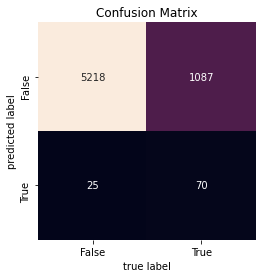

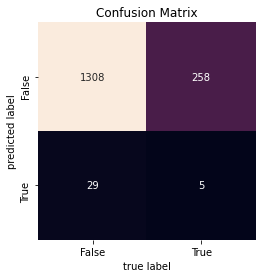

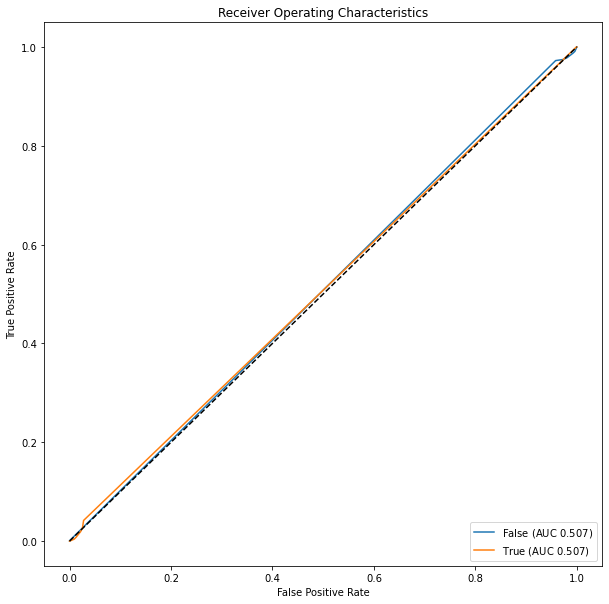

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


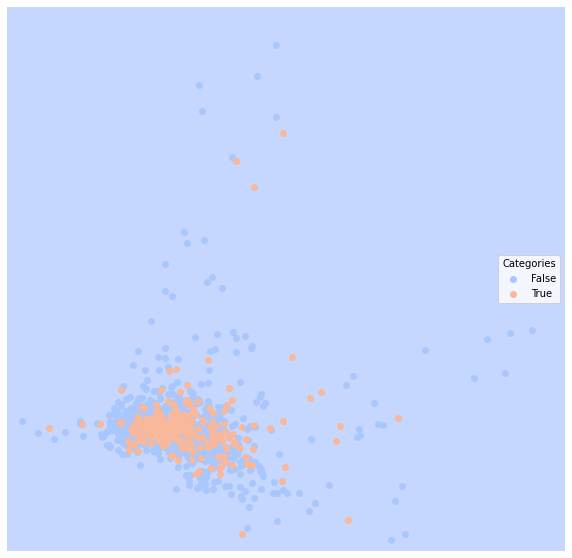

In [102]:
test_data_df['dt_pred'] = tree.predict(np.stack(test_data_df['vect'], axis=0))
print(sklearn.metrics.precision_score(test_data_df['dt_pred'], test_data_df['category'],
                                      average = 'weighted'))
print(sklearn.metrics.recall_score(test_data_df['dt_pred'], test_data_df['category'],
                                  average = 'weighted'))
print(sklearn.metrics.f1_score(test_data_df['dt_pred'], test_data_df['category'],
                               average = 'weighted'))
lucem_illud.plotConfusionMatrix(tree, train_data_df)
lucem_illud.plotConfusionMatrix(tree, test_data_df)
lucem_illud.plotMultiROC(tree, test_data_df)
lucem_illud.plotregions(tree, test_data_df)


### To apply the prediction on the uncoded data with decision tree

In [21]:
TFVects_uncoded = TFVectorizer.transform(uncoded['text'])
uncoded['vect'] = [np.array(v).flatten() for v in TFVects_uncoded.todense()]
uncoded['pred'] = tree.predict(np.stack(uncoded['vect'], axis=0))
uncoded['pred_prob_true'] = tree.predict_proba(np.stack(uncoded['vect'], axis=0))[:,0]
uncoded[['text', 'pred', 'pred_prob_true']].head()

,text,pred,pred_prob_true
4740,The economic boom of the 1990s raised the inco...,False,0.837213
5606,"Stocks advanced broadly today, breaking a four...",False,0.837213
4824,Stock prices tumbled for the fourth straight d...,False,0.837213
4205,"With beef prices again leading the way, the co...",False,0.837213
3228,HSBC Holdings' takeover this week of Mexico's ...,False,0.550725


### How about improving the max_depth?   
Here, compared to the previous analysis, I change the max_depth from 4 to 12 to see if there are any differences.

In [75]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth= 12,random_state=0)
tree.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['category'])

DecisionTreeClassifier(max_depth=12, random_state=0)

In [76]:
lucem_illud.evaluateClassifier(tree, train_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.152969,0.579661,0.845284,0.845188,0.996004
True,0.152969,0.579661,0.899038,0.296517,0.163319


In [77]:
lucem_illud.evaluateClassifier(tree, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.1875,0.513619,0.832145,0.832021,0.969057
True,0.1875,0.513619,0.280702,0.178207,0.058182


0.9366066895368782
0.8125
0.8669326889146545


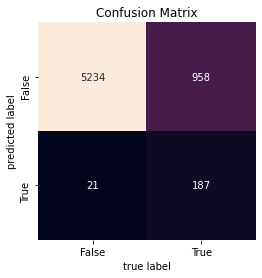

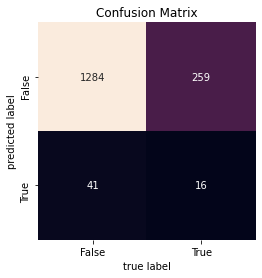

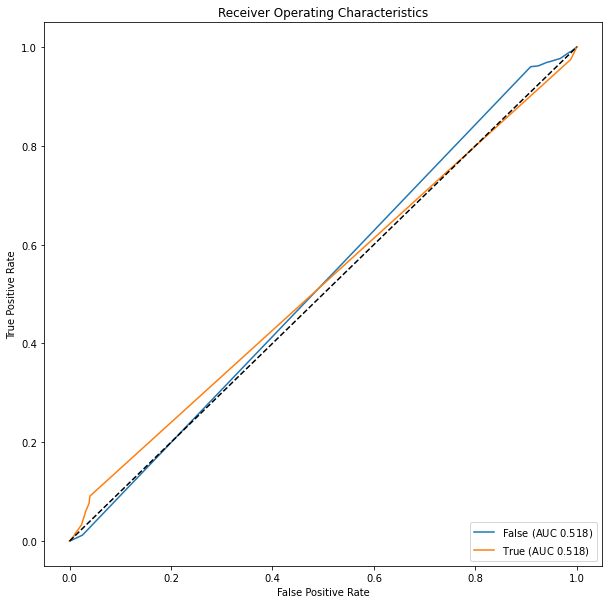

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


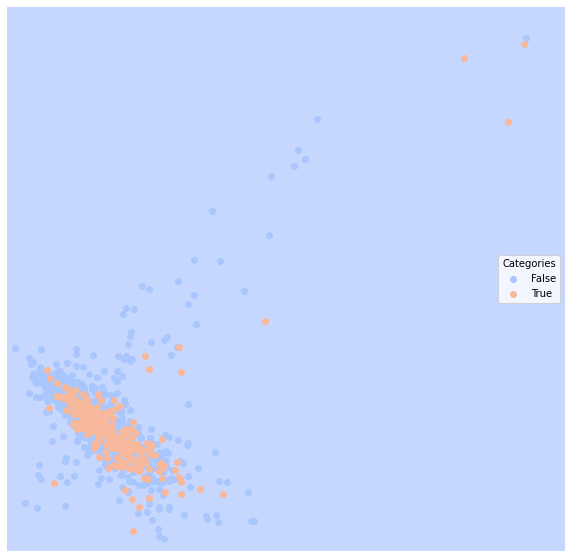

In [78]:
test_data_df['dt_pred'] = tree.predict(np.stack(test_data_df['vect'], axis=0))
print(sklearn.metrics.precision_score(test_data_df['dt_pred'], test_data_df['category'],
                                      average = 'weighted'))
print(sklearn.metrics.recall_score(test_data_df['dt_pred'], test_data_df['category'],
                                  average = 'weighted'))
print(sklearn.metrics.f1_score(test_data_df['dt_pred'], test_data_df['category'],
                               average = 'weighted'))
lucem_illud.plotConfusionMatrix(tree, train_data_df)
lucem_illud.plotConfusionMatrix(tree, test_data_df)
lucem_illud.plotMultiROC(tree, test_data_df)
lucem_illud.plotregions(tree, test_data_df)


### Try to use bagging

Then, try with the bagging.

In [79]:
bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, 
                                         max_samples=0.8, random_state=1) 
bag.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['category']) 

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=12,
                                                        random_state=0),
                  max_samples=0.8, n_estimators=100, random_state=1)

In [80]:
print(sklearn.metrics.accuracy_score(train_data_df['category'], 
                            bag.predict(np.stack(train_data_df['vect'], axis = 0))))
print(sklearn.metrics.accuracy_score(test_data_df['category'], 
                            bag.predict(np.stack(test_data_df['vect'], axis = 0))))

0.825625
0.8275


In [81]:
lucem_illud.evaluateClassifier(bag, train_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.174375,0.512664,0.824831,0.824831,1.000000
True,0.174375,0.512664,1.000000,0.199703,0.025328


In [82]:
lucem_illud.evaluateClassifier(bag, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.1725,0.501063,0.828428,0.828428,0.998491
True,0.1725,0.501063,0.333333,0.172462,0.003636


0.9966252144082333
0.8275
0.9038597417753682


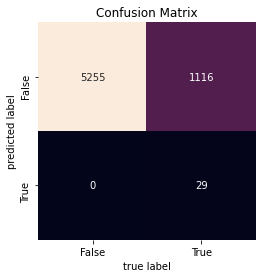

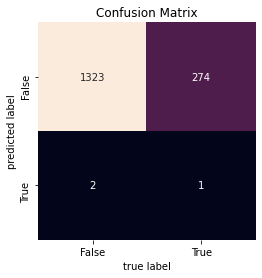

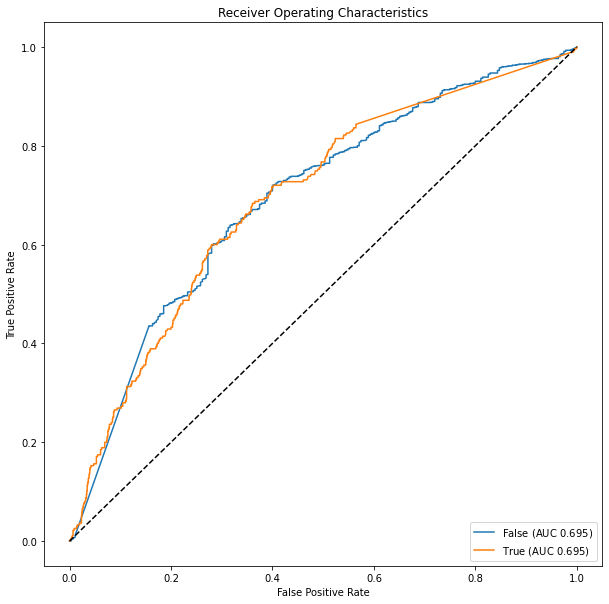

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


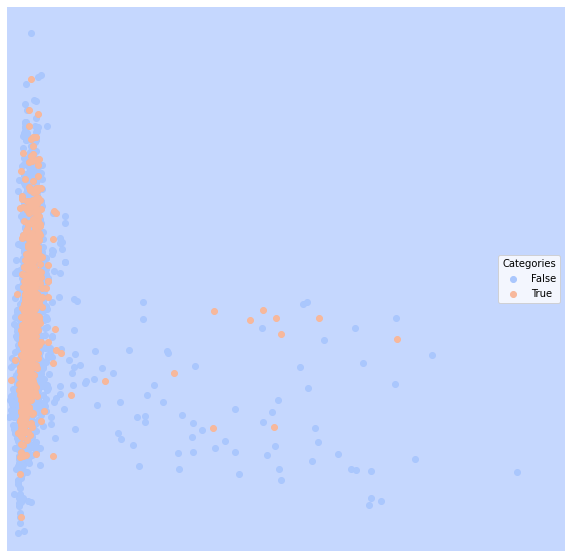

In [83]:
test_data_df['bag_pred'] = bag.predict(np.stack(test_data_df['vect'], axis=0))
print(sklearn.metrics.precision_score(test_data_df['bag_pred'], test_data_df['category'],
                                      average = 'weighted'))
print(sklearn.metrics.recall_score(test_data_df['bag_pred'], test_data_df['category'],
                                  average = 'weighted'))
print(sklearn.metrics.f1_score(test_data_df['bag_pred'], test_data_df['category'],
                               average = 'weighted'))
lucem_illud.plotConfusionMatrix(bag, train_data_df)
lucem_illud.plotConfusionMatrix(bag, test_data_df)
lucem_illud.plotMultiROC(bag, test_data_df)
lucem_illud.plotregions(bag, train_data_df)

# K-Nearest Neighbors

The K-Nearest neighbors classifier takes a simpler premise than those before: Find the closest labeled datapoint in set and "borrow" its label.

Let's use newsgroup data again.

In [ ]:
newsgroupsDF[:5]

Make a testing and training set:

In [ ]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud_2020.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

Let's initialize our k-nearest neighbors classifier:

In [ ]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

Let's try to classify using the TF-IDF vectors:

In [ ]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

In [ ]:
clf_knearest.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

In [ ]:
lucem_illud_2020.evaluateClassifier(clf_knearest, train_ng_df)

And lets look at the testing data

In [ ]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = clf_knearest.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(clf_knearest.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Let's produce another confusion matrix:

In [ ]:
lucem_illud_2020.plotConfusionMatrix(clf_knearest, test_ng_df)

You can produce the PCA space visual if you want, altough it can take a very long time, so we'll leave it optionally commented out:

In [ ]:
#lucem_illud_2020.plotregions(clf_knearest, test_ng_df)

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

In [22]:
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 15, 
                                                      weights="uniform")
knn.fit(np.stack(train_data_df['vect'], axis = 0), train_data_df['category'])

KNeighborsClassifier(n_neighbors=15)

In [ ]:
print(sklearn.metrics.accuracy_score(train_data_df['category'], 
                            clf_knearest.predict(np.stack(train_data_df['vect'], axis = 0))))
print(sklearn.metrics.accuracy_score(test_data_df['category'], test_data_df['knn_predict']))

In [8]:
lucem_illud.evaluateClassifier(knn, train_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.169531,0.577784,0.845173,0.844481,0.971450
True,0.169531,0.577784,0.584488,0.253709,0.184119


In [9]:
lucem_illud.evaluateClassifier(knn, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.1825,0.540988,0.841029,0.840557,0.961538
True,0.1825,0.540988,0.392857,0.197940,0.120438


0.9173806850084222
0.8175
0.8598283135253716


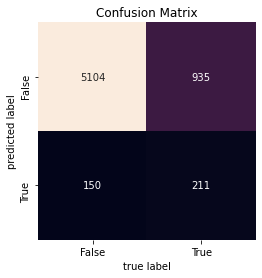

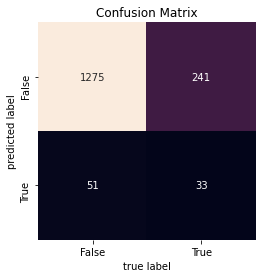

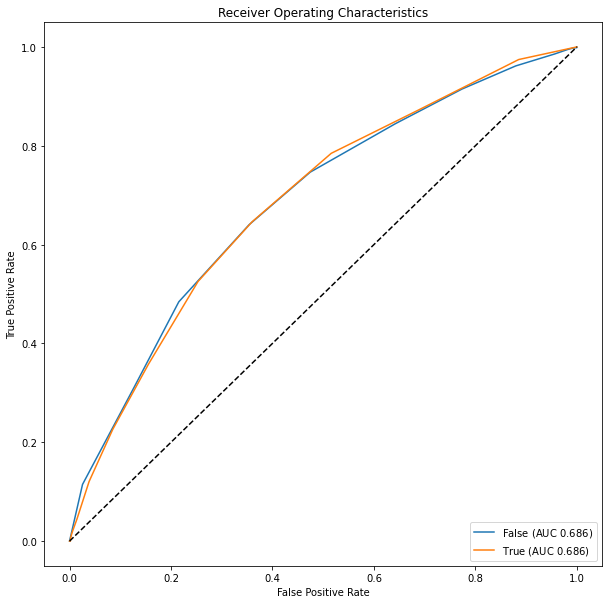

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


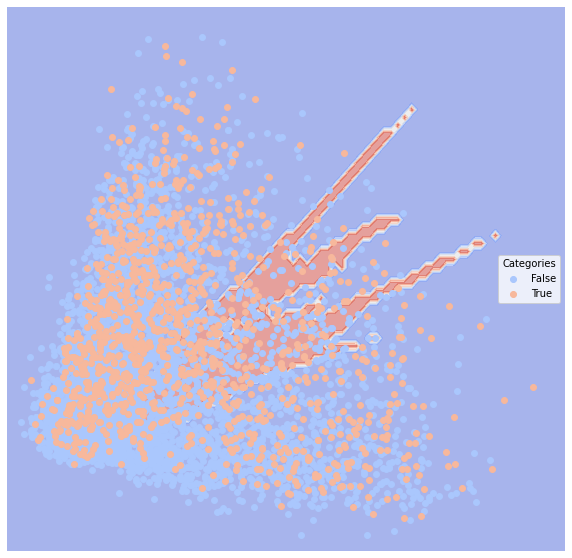

In [10]:
test_data_df['knn_pred'] = knn.predict(np.stack(test_data_df['vect'], axis=0))
print(sklearn.metrics.precision_score(test_data_df['knn_pred'], test_data_df['category'],
                                      average = 'weighted'))
print(sklearn.metrics.recall_score(test_data_df['knn_pred'], test_data_df['category'],
                                  average = 'weighted'))
print(sklearn.metrics.f1_score(test_data_df['knn_pred'], test_data_df['category'],
                               average = 'weighted'))
lucem_illud.plotConfusionMatrix(knn, train_data_df)
lucem_illud.plotConfusionMatrix(knn, test_data_df)
lucem_illud.plotMultiROC(knn, test_data_df)
lucem_illud.plotregions(knn, train_data_df)


To apply the prediction on the uncoded data with logistic regression

In [23]:
TFVects_uncoded = TFVectorizer.transform(uncoded['text'])
uncoded['vect'] = [np.array(v).flatten() for v in TFVects_uncoded.todense()]
uncoded['pred'] = knn.predict(np.stack(uncoded['vect'], axis=0))
uncoded['pred_prob_true'] = knn.predict_proba(np.stack(uncoded['vect'], axis=0))[:,0]
uncoded[['text', 'pred', 'pred_prob_true']].head()

,text,pred,pred_prob_true
4740,The economic boom of the 1990s raised the inco...,False,0.866667
5606,"Stocks advanced broadly today, breaking a four...",False,0.666667
4824,Stock prices tumbled for the fourth straight d...,False,0.533333
4205,"With beef prices again leading the way, the co...",False,0.800000
3228,HSBC Holdings' takeover this week of Mexico's ...,False,0.866667


# SVMs

Now we will examine Support Vector Machines, an approach that creates the partition that preserves the "maximum margin" between classes.

We will use a few sub forums from reddit--which tend to share text rather than memes--namely `talesfromtechsupport`, `badroommates`, `weeabootales` and `relationships`. The top 100 text posts from each have been saved to `data/reddit.csv`.

In [ ]:
redditDf = pandas.read_csv('../data/reddit.csv', index_col = 0)

#Drop a couple missing values

redditDf = redditDf.dropna()

#Set category

redditDf['category'] = redditDf['subreddit']

#tokenize and normalize
redditDf['tokenized_text'] = redditDf['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
redditDf['normalized_text'] = redditDf['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

We will tf.idf the data to make our vectors:

In [ ]:
redditTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, min_df=3, stop_words='english', norm='l2')
redditTFVects = redditTFVectorizer.fit_transform([' '.join(l) for l in redditDf['normalized_text']])
redditDf['vect'] = [np.array(v).flatten() for v in redditTFVects.todense()]

Initilize the model and make a train test split:

In [ ]:
holdBackFraction = .2
train_redditDf, test_redditDf = lucem_illud_2020.trainTestSplit(redditDf, holdBackFraction=holdBackFraction)

In [ ]:
clf_svm = sklearn.svm.SVC(kernel='linear', probability = False)
#probability = True is slower but  lets you call predict_proba()
clf_svm.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

...and consider the results:

In [ ]:
lucem_illud_2020.evaluateClassifier(clf_svm, test_redditDf)

In [ ]:
lucem_illud_2020.plotConfusionMatrix(clf_svm, test_redditDf)

In [ ]:
lucem_illud_2020.plotregions(clf_svm, test_redditDf)

# Neural Nets

We include an example of a simple neural network, the Multi-layer Perceptron (MLP) that learns a function $f(\cdot): R^m \rightarrow R^o$ by training on a dataset, where $m$ is the number of dimensions for input and $o$ is the number of dimensions for output. Given a set of features $X = {x_1, x_2, ..., x_m}$ and a target $y$, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. The following figure shows a one hidden layer MLP with scalar output. ![title](../data/multilayerperceptron_network.png) The leftmost layer, known as the input layer, consists of a set of "neurons" $\{x_i | x_1, x_2, ..., x_m\}$ representing the input features (e.g., weighted words). Each neuron in the hidden layer transforms the values from the previous layer with a weighted linear summation $w_1x_1 + w_2x_2 + ... + w_mx_m$, followed by a non-linear activation function $g(\cdot):R \rightarrow R$ - like the logistic or hyperbolic tan function. The output layer receives the values from the last hidden layer and transforms them into output values.

In [ ]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

In [ ]:
lucem_illud_2020.evaluateClassifier(clf_nn, test_redditDf)

In [ ]:
lucem_illud_2020.plotConfusionMatrix(clf_nn, test_redditDf)

In [ ]:
lucem_illud_2020.plotregions(clf_nn, test_redditDf)

It performs very well.

## <span style="color:red">*Exercise 5*</span>

<span style="color:red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?

It's surprisingly that the accuracy on the training set is 1.0, while the accuracy on the testing set is less than 0.8. It seems wierd, but it could be just explained by overfitting, and it also tends to categorize all the news to be False (not relevant to US economy), as we can see in the confusion matrix of the training set.

The differences between neural network and other classifier: compared to logistic regression and naive bayes, the Neural Network method doesn't assume the distribution or pattern of the data; it's less sensitive to noises compared to KNN and decision tree method.

In [16]:
network = sklearn.neural_network.MLPClassifier()
network.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
test_data_df['neural_pred'] = network.predict(np.stack(test_data_df['vect'], axis=0))

print(sklearn.metrics.accuracy_score(train_data_df['category'], 
                            network.predict(np.stack(train_data_df['vect'], axis = 0))))
print(sklearn.metrics.accuracy_score(test_data_df['category'], test_data_df['neural_pred']))


1.0
0.79625


0.8236417357510101
0.79625
0.8085490763313956


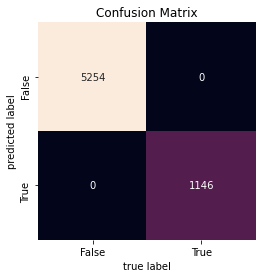

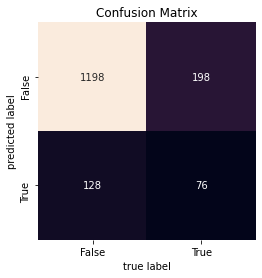

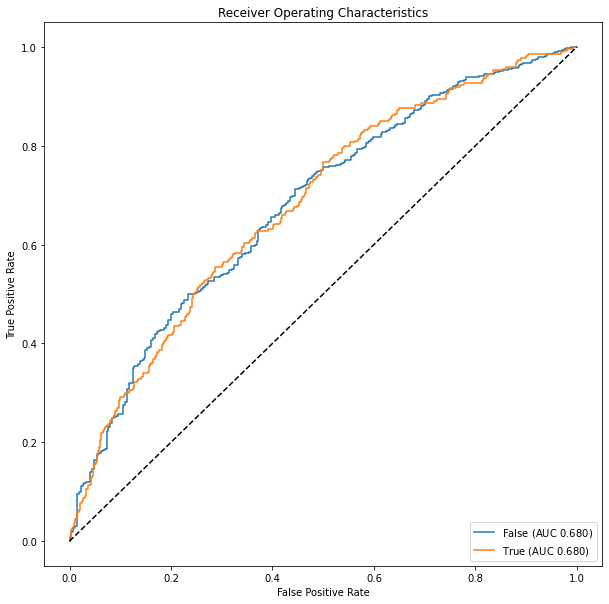

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


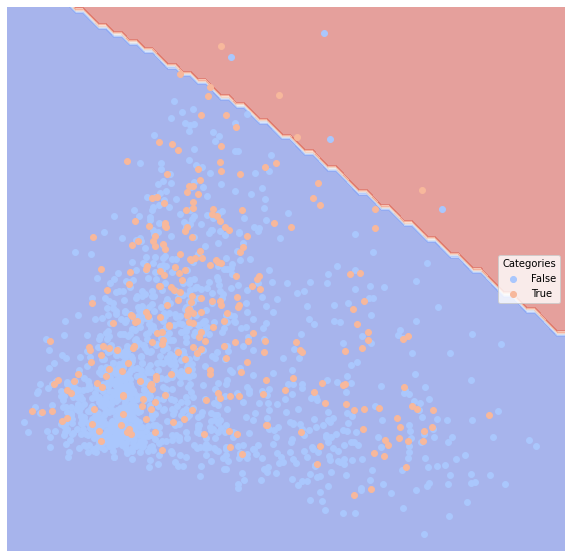

In [17]:
print(sklearn.metrics.precision_score(test_data_df['neural_pred'], test_data_df['category'],
                                      average = 'weighted'))
print(sklearn.metrics.recall_score(test_data_df['neural_pred'], test_data_df['category'],
                                  average = 'weighted'))
print(sklearn.metrics.f1_score(test_data_df['neural_pred'], test_data_df['category'],
                               average = 'weighted'))
lucem_illud.plotConfusionMatrix(network, train_data_df)
lucem_illud.plotConfusionMatrix(network, test_data_df)
lucem_illud.plotMultiROC(network, test_data_df)
lucem_illud.plotregions(network, test_data_df)


To apply the prediction on the uncoded data with logistic regression

In [25]:
network = sklearn.neural_network.MLPClassifier()
network.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

MLPClassifier()

In [26]:
TFVects_uncoded = TFVectorizer.transform(uncoded['text'])
uncoded['vect'] = [np.array(v).flatten() for v in TFVects_uncoded.todense()]
uncoded['pred'] = network.predict(np.stack(uncoded['vect'], axis=0))
uncoded['pred_prob_true'] = network.predict_proba(np.stack(uncoded['vect'], axis=0))[:,0]
uncoded[['text', 'pred', 'pred_prob_true']].head()

,text,pred,pred_prob_true
4740,The economic boom of the 1990s raised the inco...,False,0.999745
5606,"Stocks advanced broadly today, breaking a four...",True,0.000896
4824,Stock prices tumbled for the fourth straight d...,True,0.002022
4205,"With beef prices again leading the way, the co...",False,0.999066
3228,HSBC Holdings' takeover this week of Mexico's ...,False,0.998726
